In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

dT = 0.01  # it will be  changed

dirPath = os.path.abspath(os.path.dirname(''))
params_file='params.txt'
data_file='data.csv'
full_data_path = os.path.join(dirPath, data_file)
full_params_path = os.path.join(dirPath, params_file)

data_raw = pd.read_csv(full_data_path)
with open(full_params_path) as file:
    l = file.readline()
    file.readline()
    dT = float((l.split(' '))[1])


data = pd.DataFrame(data=data_raw)
interest_a = 190
interest_b = 210
dT = data['t'][1]-data['t'][0]
d = data[interest_a:interest_b] #19 30

n = 1   # granularity
data.head(20)

,x,y,t,torque,steering_angle,long_acc,long_vel,lat_acc,lat_vel,yaw_angle,...,slip_angle_f,slip_angle_r,norm_load_f,norm_load_r,slip_angle_est_f,slip_angle_est_r,lat_for_f,lat_for_r,track_progress,error
0,0.001994,2.144850e-30,0.000,-1170.0,2.773750e-24,-6.03715,1.99396,2.144850e-24,2.144850e-27,2.333760e-30,...,2.773750e-24,0.000000e+00,6923.75,5753.75,2.861530e-24,0.000000e+00,1.359480e-20,0.000000e+00,0.000000,8.881780e-16
1,0.003982,6.425630e-30,0.001,-1170.0,2.773750e-24,-6.03715,1.98793,2.131290e-24,4.276140e-27,6.985180e-30,...,2.770340e-24,1.265150e-27,6923.75,5753.75,2.858010e-24,1.570600e-27,1.357810e-20,5.180840e-24,0.000000,8.881780e-16
2,0.005964,1.283340e-29,0.002,-1170.0,2.773750e-24,-6.03715,1.98189,2.117810e-24,6.393950e-27,1.393820e-29,...,2.766920e-24,2.526270e-27,6923.75,5753.75,2.854490e-24,3.136180e-27,1.356130e-20,1.034520e-23,0.000000,8.881780e-16
3,0.007940,2.135930e-29,0.003,-1170.0,2.773750e-24,-6.03715,1.97585,2.104390e-24,8.498340e-27,2.317680e-29,...,2.763520e-24,3.783320e-27,6923.75,5753.75,2.850970e-24,4.696720e-27,1.354460e-20,1.549280e-23,0.000000,8.881780e-16
4,0.009909,3.199440e-29,0.004,-1170.0,2.773750e-24,-6.03715,1.96981,2.091050e-24,1.058940e-26,3.468480e-29,...,2.760110e-24,5.036250e-27,6923.75,5753.75,2.847460e-24,6.252140e-27,1.352800e-20,2.062360e-23,0.000000,8.881780e-16
5,0.011873,4.472960e-29,0.005,-1170.0,2.773750e-24,-6.03715,1.96378,2.077770e-24,1.266720e-26,4.844630e-29,...,2.756720e-24,6.285030e-27,6923.75,5753.75,2.843960e-24,7.802410e-27,1.351130e-20,2.573740e-23,0.000000,8.881780e-16
6,0.013831,5.955620e-29,0.006,-1170.0,2.773750e-24,-6.03715,1.95774,2.064550e-24,1.473170e-26,6.444530e-29,...,2.753320e-24,7.529630e-27,6923.75,5753.75,2.840450e-24,9.347480e-27,1.349470e-20,3.083400e-23,0.000000,8.881780e-16
7,0.015783,7.646510e-29,0.007,-1170.0,2.773750e-24,-6.03715,1.95170,2.051410e-24,1.678310e-26,8.266580e-29,...,2.749930e-24,8.769990e-27,6923.75,5753.75,2.836960e-24,1.088730e-26,1.347810e-20,3.591330e-23,0.000000,8.881780e-16
8,0.017728,9.544740e-29,0.008,-1170.0,2.773750e-24,-6.03715,1.94567,2.038320e-24,1.882140e-26,1.030920e-28,...,2.746550e-24,1.000610e-26,6923.75,5753.75,2.833470e-24,1.242180e-26,1.346150e-20,4.097520e-23,0.000000,8.881780e-16
9,0.019668,1.164940e-28,0.009,-1170.0,2.773750e-24,-6.03715,1.93963,2.025310e-24,2.084670e-26,1.257070e-28,...,2.743170e-24,1.123790e-26,6923.75,5753.75,2.829980e-24,1.395100e-26,1.344490e-20,4.601930e-23,0.000000,8.881780e-16


In [11]:
stri = 'marcel'
if stri == 'marcin':
    print('OK')
else:
    print('NO')

NO


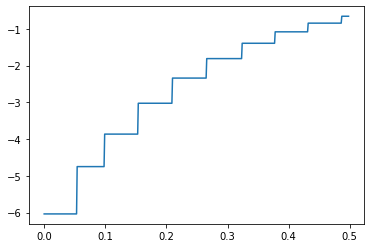

In [12]:
plt.plot(data['t'], data['long_acc'])

In [13]:
#change_1 = int(angle_ch_t_1/dT)
#change_2 = int(angle_ch_t_2/dT)
#change_1

Text(0.5, 1.0, 'speed(t)')

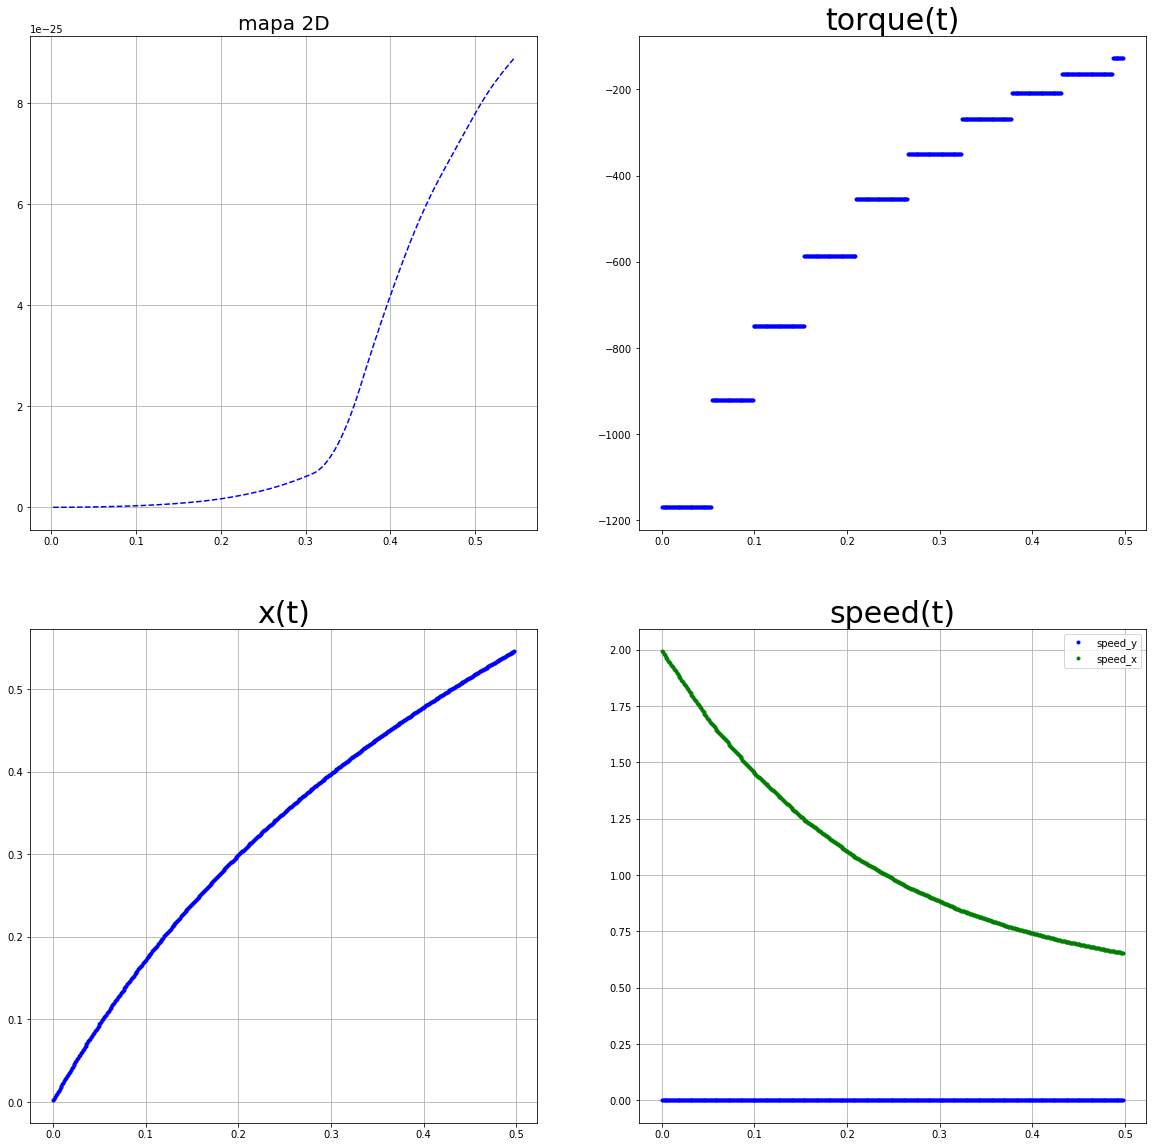

In [14]:
begin = 4  #secconds
end = 5    #secconds

plt.figure(figsize=(20,20))
granularity = 1

x = data['x'][::granularity]
y = data['y'][::granularity]
t = data['t'][::granularity]
speed_x = data['long_vel'][::granularity]
speed_y = data['lat_vel'][::granularity]

# mapa 2d
ax = plt.subplot(221)
plt.plot(x, y, '--b')
plt.grid(True)
plt.title('mapa 2D', fontsize=20)
#ax.set_aspect('equal')


# x(t)
ax = plt.subplot(223)
plt.plot(t, x, '.b')
plt.grid(True)
plt.title('x(t)', fontsize=30)
#ax.set_aspect('equal')


# y(t)
#ax = plt.subplot(223)
#plt.plot(t, y, '--b')
#plt.grid(True)
#plt.title('y(t)', fontsize=30)
#ax.set_aspect('equal')

ax = plt.subplot(222)
plt.plot(data['t'][:][::granularity], data['torque'][:][::granularity], '.b')
plt.title('torque(t)', fontsize=30)

# speed
ax = plt.subplot(224)
ax.plot(t, speed_y, '.b', label='speed_y')
ax.plot(t, speed_x, '.g', label='speed_x',)
ax.grid(True)
ax.legend()
plt.title('speed(t)', fontsize=30)
#ax.set_aspect('equal')


[]

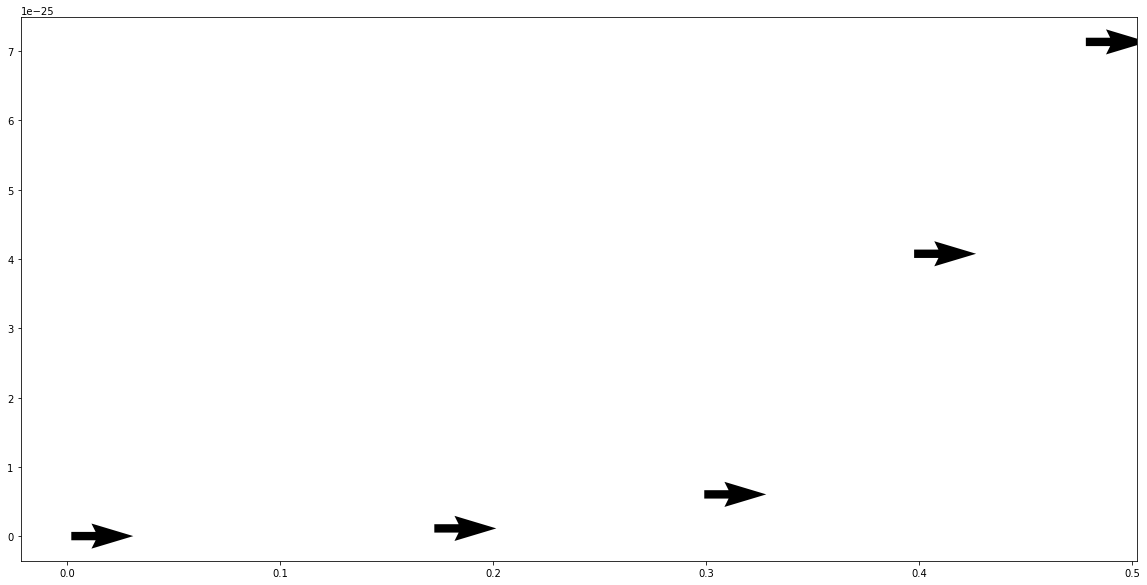

In [15]:
data_yaws = data['yaw_angle']
data_x = data['x']
data_y = data['y']
n = 100

x = data_x[::n]
y = data_y[::n]
u = np.cos(data_yaws)[::n]
v = np.sin(data_yaws)[::n]
#u = data['long_vel'][::100]
#v = data['lat_vel'][::100]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
#ax.set_aspect('equal')
plt.quiver(x,y, u,v)
plt.plot()

Text(0.5, 1.0, 'torque(t)')

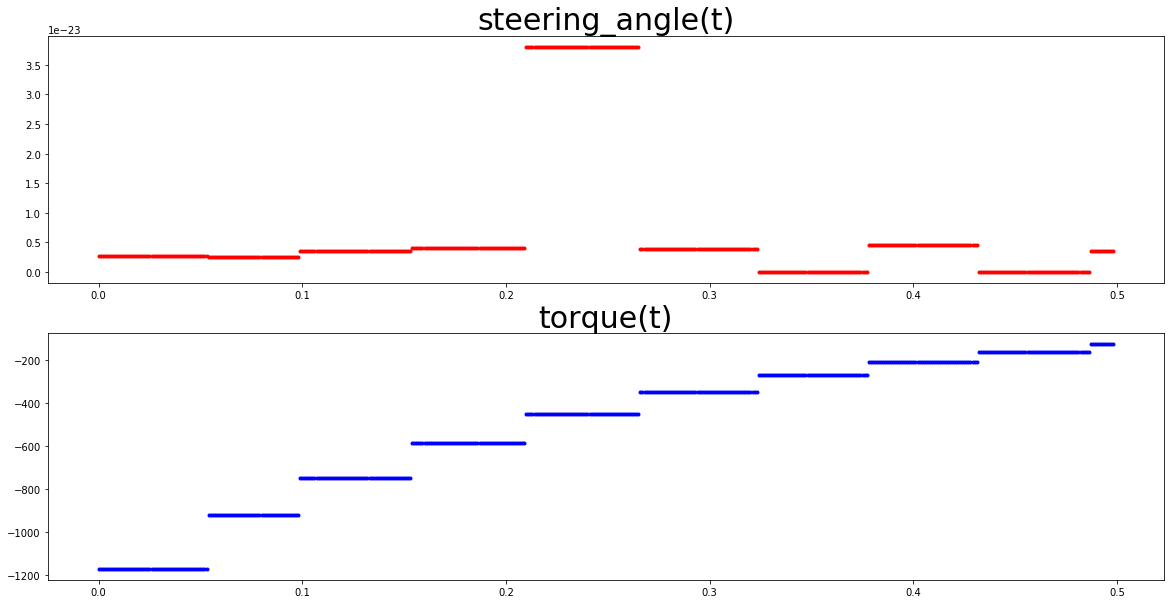

In [16]:
fig = plt.figure(figsize=(20,10))
granularity = 1
plt.subplot(211)
plt.plot(data['t'][:][::granularity], data['steering_angle'][:][::granularity], '.r')
plt.title('steering_angle(t)', fontsize=30)

plt.subplot(212)
plt.plot(data['t'][:][::granularity], data['torque'][:][::granularity], '.b')
plt.title('torque(t)', fontsize=30)

Text(0.5, 1.0, 'kąt(t)')

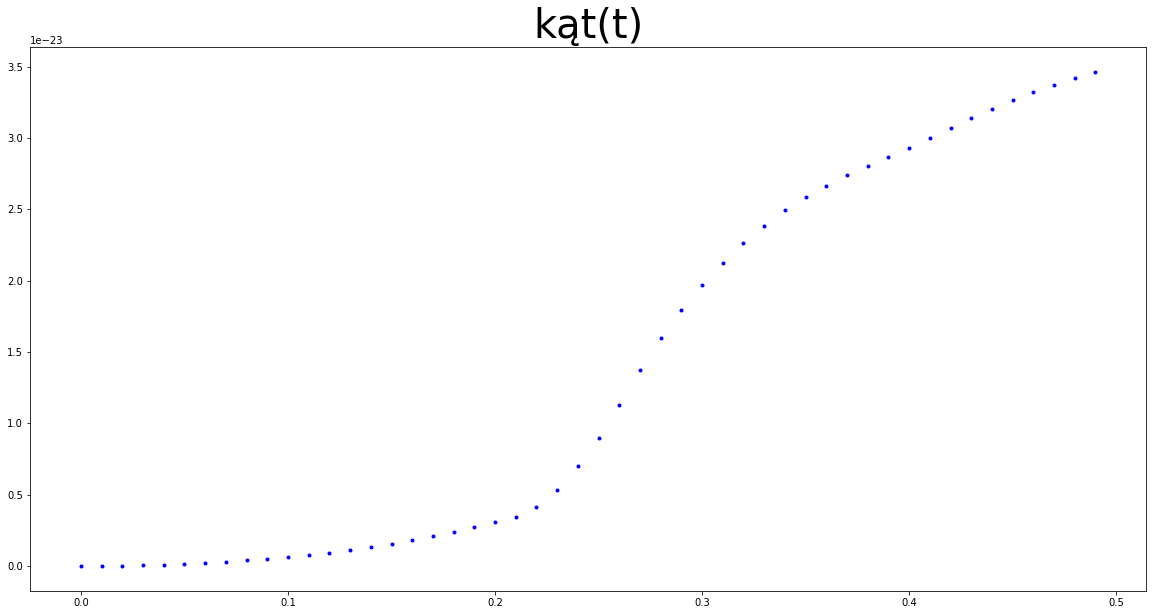

In [17]:
interest_a = 0
interest_b = 800
n = 10
yaw = np.rad2deg(np.unwrap(data['yaw_angle'][:][::n])) %360

max_yaw = np.max(yaw)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][:][::n], yaw, '.b')
plt.title('kąt(t)', fontsize=40)

Text(0.5, 1.0, 'speed x and y')

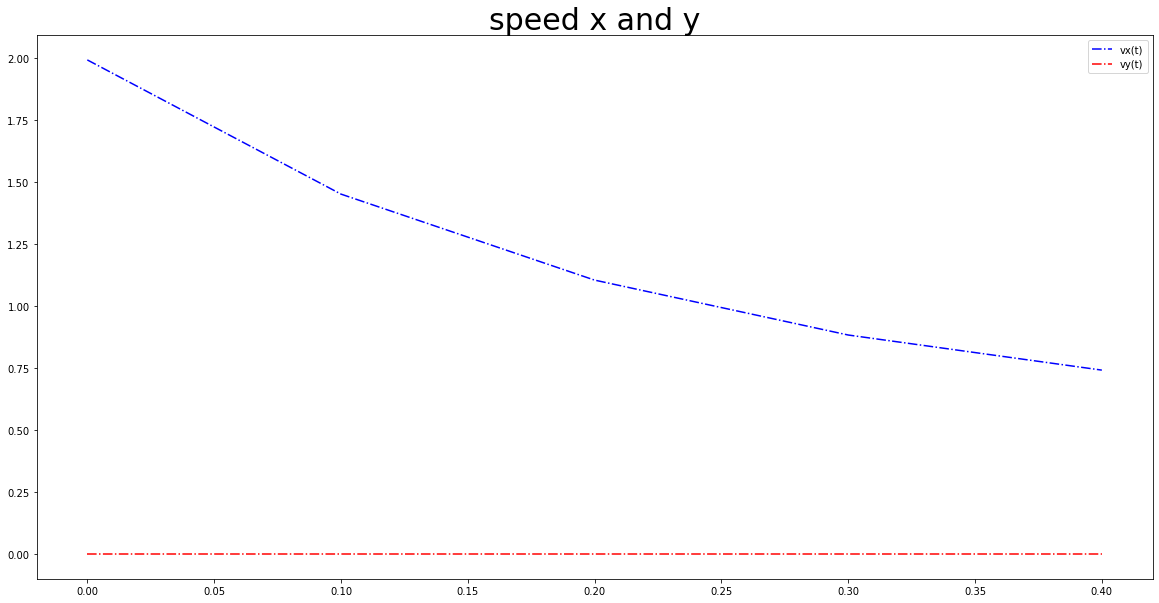

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
max_speed = np.max([data['long_vel'], data['lat_vel']])
n = 100
ax.plot(data['t'][::n], data['long_vel'][::n], '-.b', label='vx(t)')
ax.plot(data['t'][::n], data['lat_vel'][::n], '-.r', label='vy(t)')
leg = ax.legend();
plt.title('speed x and y', fontsize=30)

In [19]:
max_speed

1.99396

Text(0.5, 1.0, 'slip_angle_front(t)')

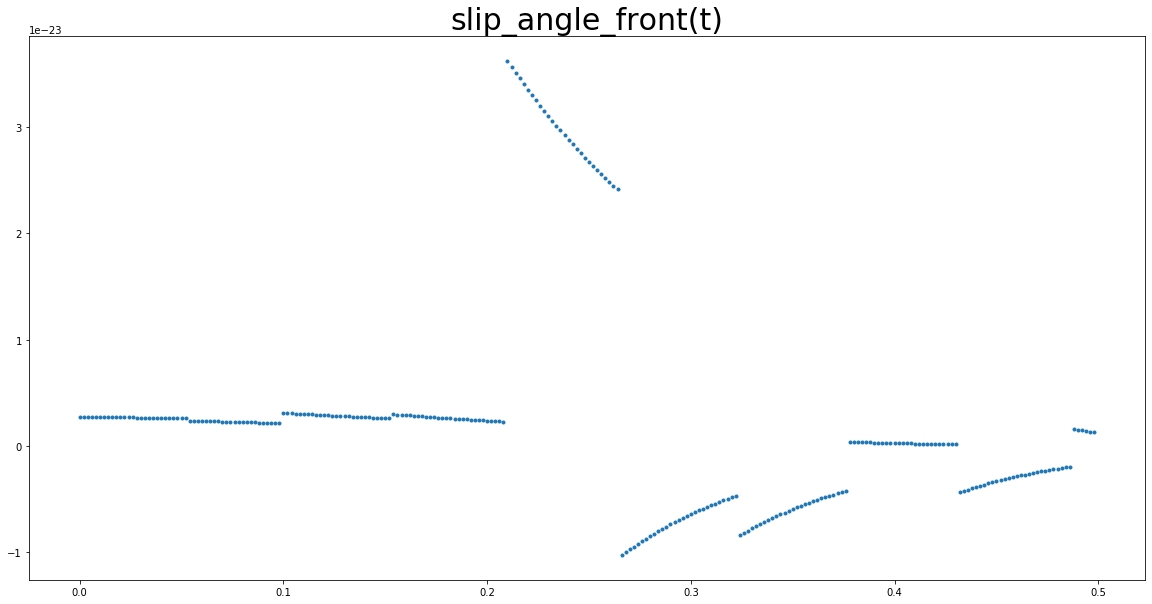

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
slip_angle = data['slip_angle_f']
interest_a = 0
interest_b = 0
n = 2

max_slip = np.max([data['slip_angle_f'], data['slip_angle_r']])
ax.plot(data['t'][:][::n], slip_angle[:][::n], '.')
plt.title('slip_angle_front(t)', fontsize=30)
#ax.plot([angle_ch_t_1]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', \
#         [angle_ch_t_2]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', alpha=0.2)

Text(0.5, 1.0, 'vx^2 + vy^2')

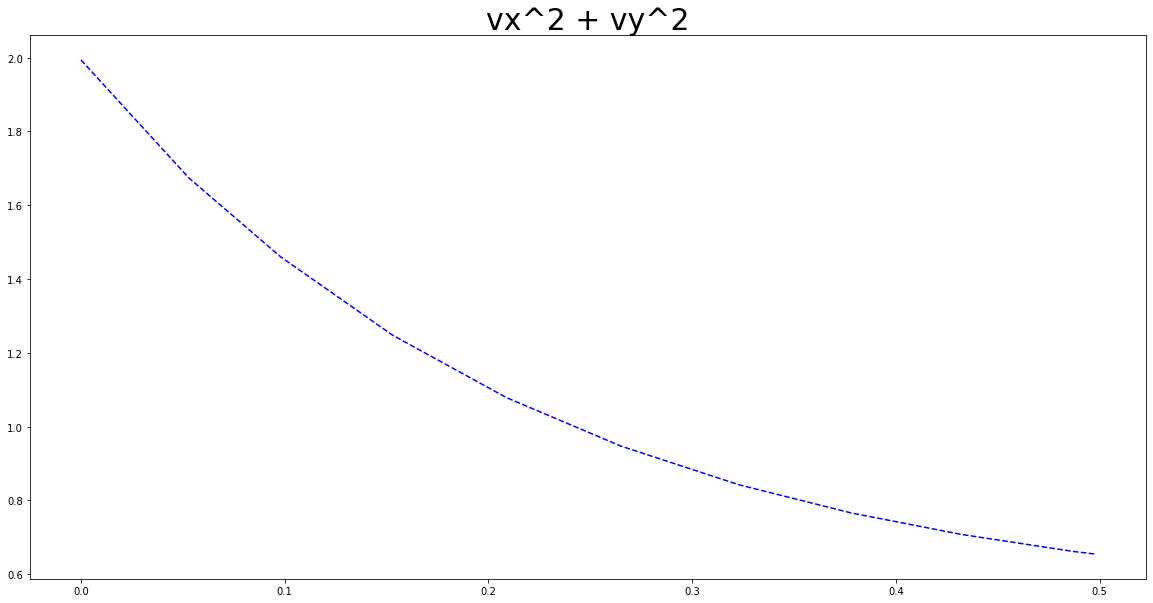

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
energy_data = np.sqrt(data['long_vel'][:]**2 + data['lat_vel'][:]**2)
max_en = np.max(energy_data)

ax.plot(data['t'][:], energy_data, '--b')
plt.title('vx^2 + vy^2', fontsize=30)

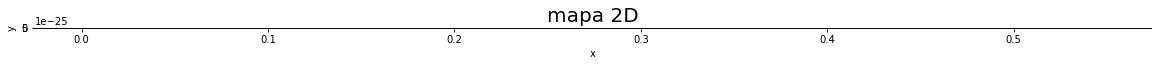

In [22]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

interest_a = 0
interest_b = 700

plt.xlabel('x')
plt.ylabel('y')
plt.title('mapa 2D', fontsize=20)
#ax = plt.gca()
#ax.set_autoscale_on(False)

plt.plot(data['x'][:][::n], data['y'][:][::n])

Text(0.5, 1.0, 'x(t)')

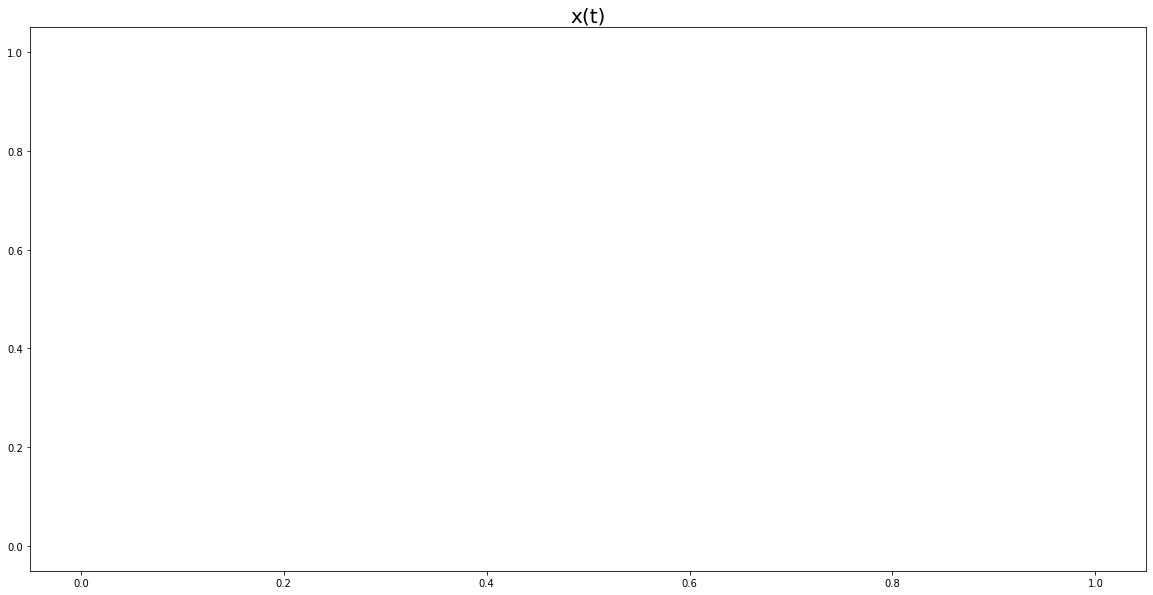

In [23]:
begin = int(4.8 / dT)
end = int(5 / dT)
plt.figure(figsize=(20,10))
plt.plot(data['t'][begin:end], data['x'][begin:end], 'r.')
plt.title('x(t)', fontsize=20)

Text(0.5, 1.0, 'y(t)')

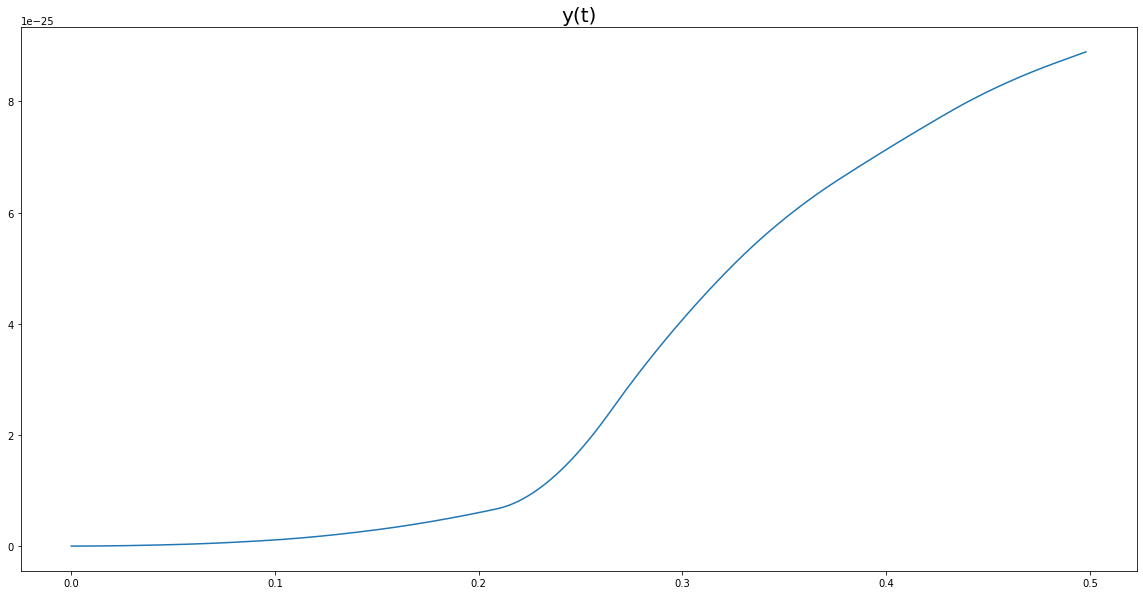

In [24]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['y'])
plt.title('y(t)', fontsize=20)

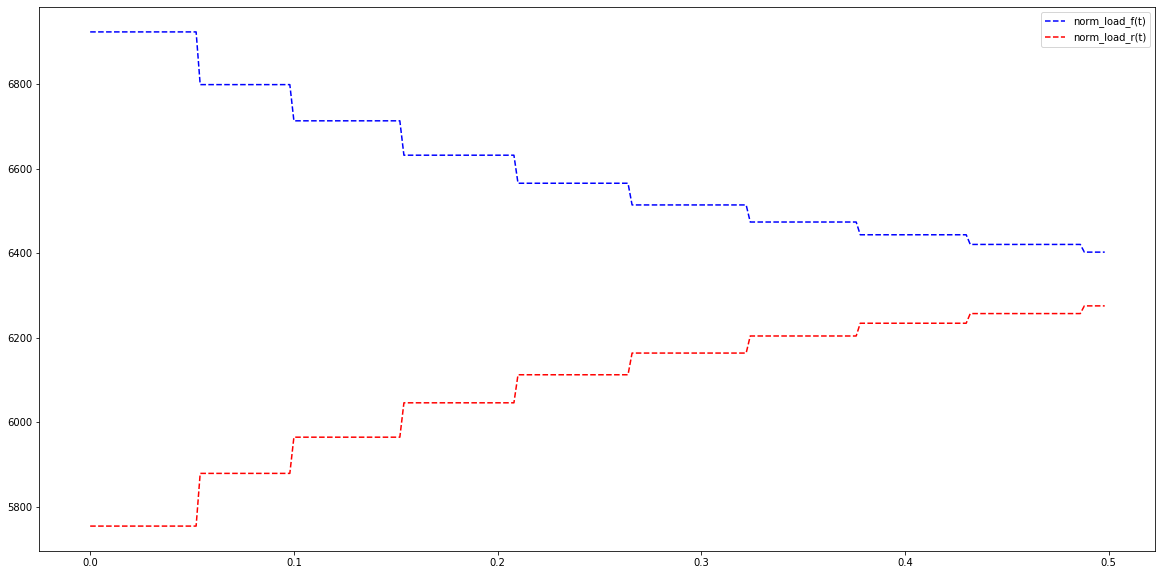

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][:][::n], data['norm_load_f'][:][::n], '--b', label='norm_load_f(t)')
ax.plot(data['t'][:][::n], data['norm_load_r'][:][::n], '--r', label='norm_load_r(t)')
leg = ax.legend();

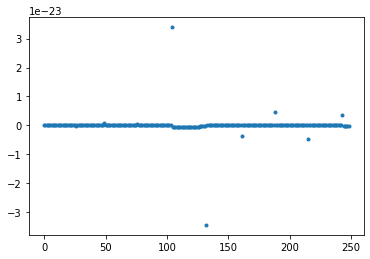

In [26]:
plt.plot(np.diff(slip_angle[interest_a:interest_b][::n]), '.')


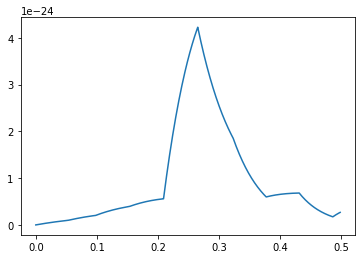

In [27]:
plt.plot(data['t'], data['yaw_rate'])

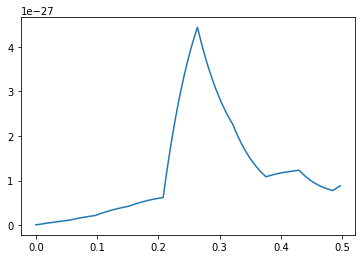

In [28]:
plt.plot(data['t'][:-1], np.diff(data['yaw_angle']))

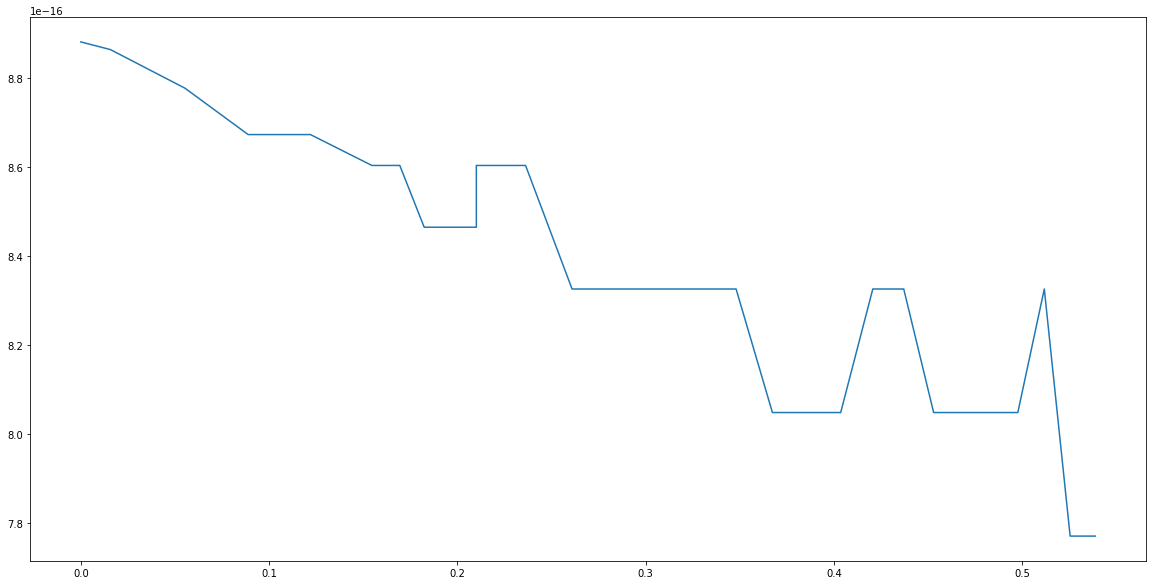

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['track_progress'], data['error'])

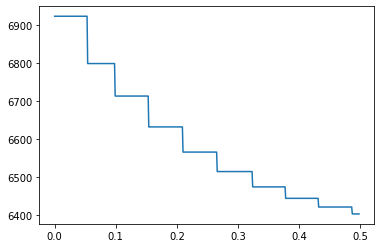

In [30]:
plt.plot(data['t'], data['norm_load_f'])